# Decision Trees
An introductory example of decision trees using data from this [interactive visualization](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is an over-simplified example that doesn't use **normalization** as a pre-processing step, or **cross validation** as a mechanism for tuning the model.

## Set up

In [1]:
# Load packages
import pandas as pd
from sklearn import tree
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read data
df = pd.read_csv('./data/housing-data.csv')

## Data Exploration
Some basic exploratory analysis before creating a decision tree

In [3]:
# What is the shape of our data?
df.shape

(492, 8)

In [4]:
# What variables are present in the dataset?
df.columns

Index([u'in_sf', u'beds', u'bath', u'price', u'year_built', u'sqft',
       u'price_per_sqft', u'elevation'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115bb79d0>]], dtype=object)

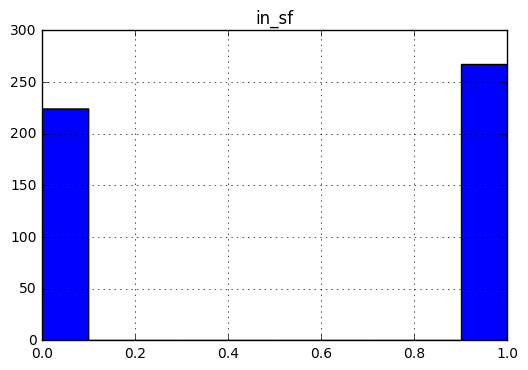

In [5]:
# What is the distribution of our outcome variable `in_sf`?
df.hist('in_sf')

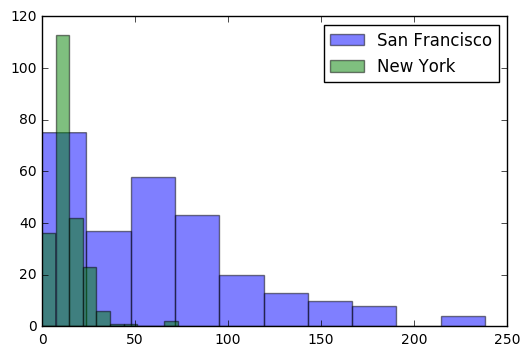

In [6]:
# How does elevation vary for houses in/not-in sf (I suggest an overlapping histogram)
plt.hist(df.elevation[df.in_sf == 1], alpha=0.5, label='San Francisco')
plt.hist(df.elevation[df.in_sf != 1], alpha=0.5, label='New York')
plt.legend(loc='upper right')
plt.show()

## Build a decision tree using all variables

In [7]:
# Create variables to hold features and outcomes separately
features = df.drop('in_sf', axis=1)
outcome = df.in_sf

In [8]:
# Split data into testing and training sets
train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size=0.30)

In [10]:
# Create a classifier and fit your features to your outcome
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_outcome)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Assess Model Fit

In [11]:
# Generate a set of predictions for your test data
test_preds = clf.predict(test_features)
test_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [12]:
# Calculate accuracy for our test set (percentage of the time that prediction == truth)
test_acc = (test_preds == test_outcome).sum()/len(test_outcome)
test_acc

0.90540540540540537

In [13]:
# By comparison, how well do we predict in our training data?
training_preds = clf.predict(train_features)
train_acc = (training_preds == train_outcome).sum()/len(train_outcome)
train_acc # Pefectly 

1.0

## Show the tree
A little bit of a pain, though there are some alternatives to the [documentation](http://scikit-learn.org/stable/modules/tree.html) presented [here](https://github.com/scikit-learn/scikit-learn/issues/6261). You may have to do the following:

```
# Install graphviz in your terminal
conda install graphviz
```

I then suggest the following solution:

```
tree.export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```


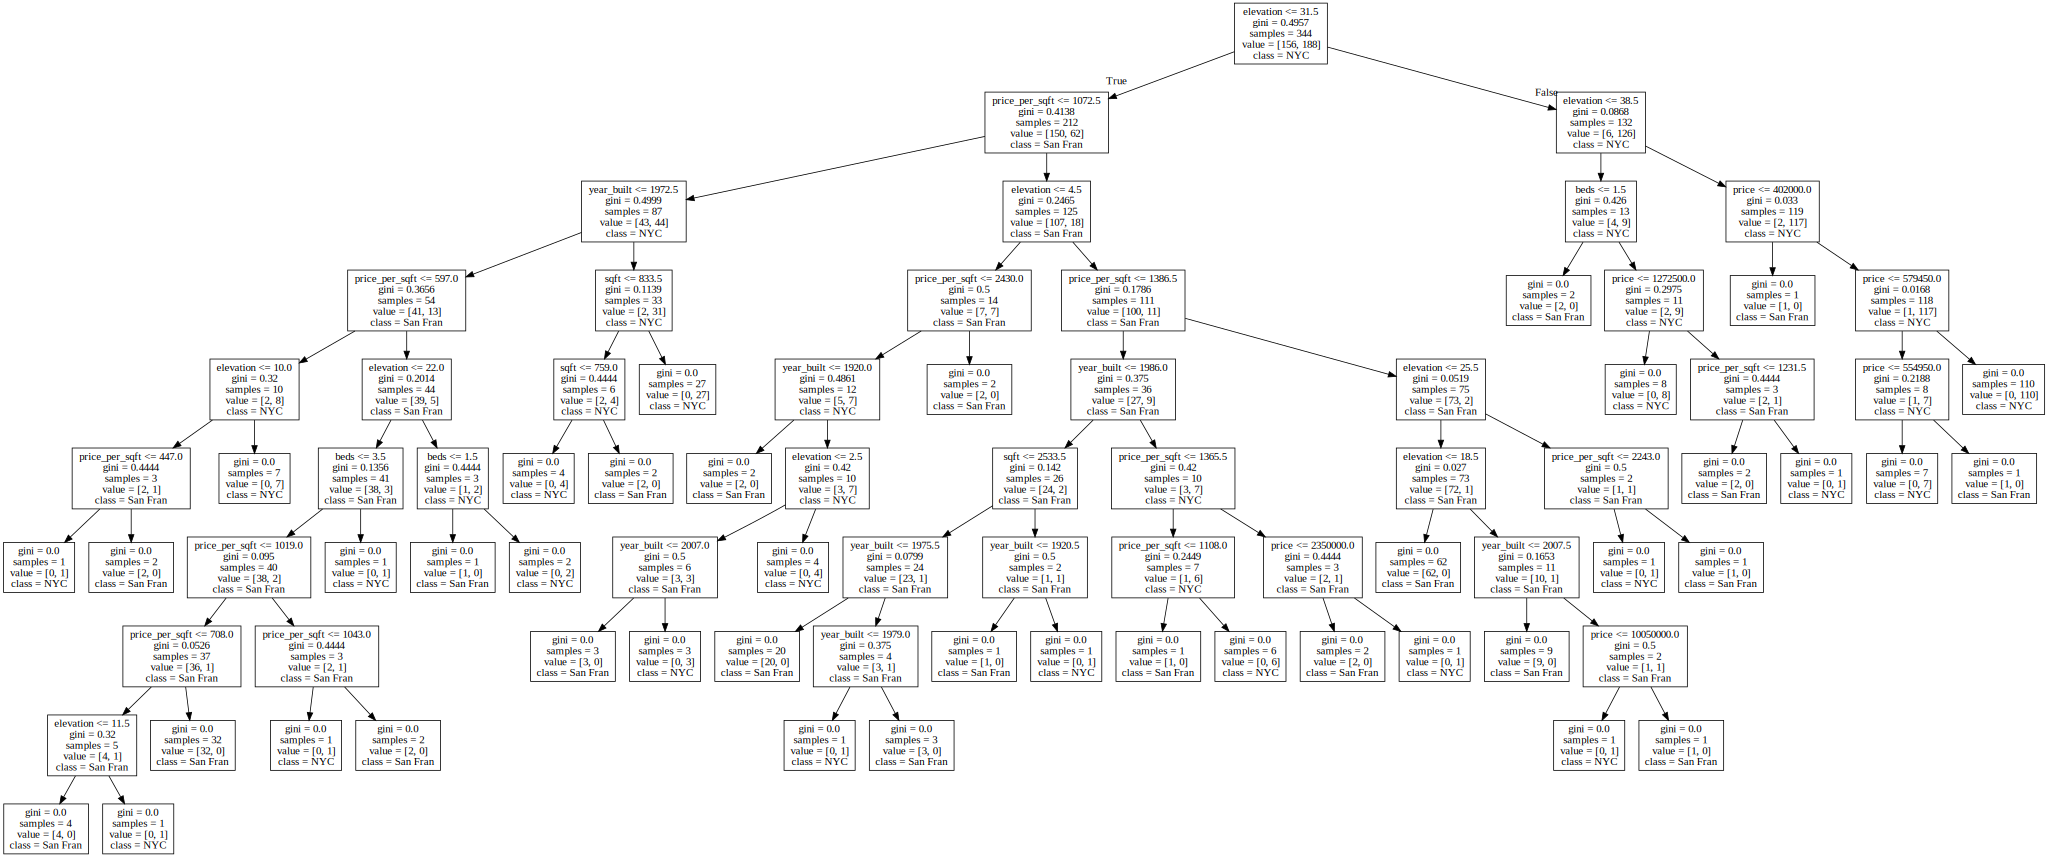

In [15]:
import graphviz
tree.export_graphviz(clf, feature_names=features.columns, class_names=['San Fran', 'NYC'], out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Comparion to KNN
Purely out of curiosity, how well does this model fit with KNN (for K=3)

In [16]:
# Create a knn classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [17]:
# Fit our classifier to our training data
knn_fit = knn_clf.fit(train_features, train_outcome)

In [18]:
# Predict on our test data and assess accuracy
knn_test_preds = knn_fit.predict(test_features)
test_acc = (knn_test_preds == test_outcome).sum()/len(test_outcome)
test_acc

0.6216216216216216